In [12]:
import os
import random
import xml.etree.ElementTree as ET
from copy import copy

In [13]:
# get all files in path
files = (file for file in os.listdir("../NOAH-Corpus") if file.endswith(".xml"))
# create dictionary for words and their frequencies
words = {}

# iterate through files
for file in files:
    # parse xml file
    print(file)
    tree = ET.parse(open("../NOAH-Corpus/" + file, "r", encoding="utf-8"))
    # get root element
    root = tree.getroot()
    # iterate through all text elements
    for article in root.iter("document"):
        for sent in article.iter("s"):
            for word_element in sent.iter("w"):
                # get word
                word = word_element.text
                word = word.lower()
                # if word is not in dictionary, add it
                if word not in words:
                    words[word] = 1
                # else increment frequency
                else:
                    words[word] += 1


sorted(words.items(), key=lambda x: x[1], reverse=True)
NOAH_frequencies = copy(words)
del words

blick.xml
blogs.xml
schobinger.xml
swatch.xml
wiki.xml


5.176436154773465
[('und', 21197), ('isch', 18917), ('de', 17210), ('das', 15846), ('es', 11269), ('die', 10940), ('aber', 10045), ('ich', 9433), ('i', 9038), ('au', 8884), ('so', 8701), ('wo', 8695), ('d', 7945), ('vo', 7800), ('', 7623), ('mit', 7364), ('en', 6580), ('du', 6410), ('dass', 5948), ('für', 5931), ('e', 5922), ('nid', 5753), ('im', 5519), ('uf', 5517), ('nöd', 5400), ('mer', 5350), ('no', 5232), ('was', 5061), ('wie', 5059), ('ja', 5011), ('in', 4870), ('oder', 4848), ('ned', 4623), ('scho', 4609), ('als', 4416), ('sind', 4243), ('wenn', 4241), ('bi', 3887), ('z', 3862), ('s', 3830), ('eifach', 3790), ('da', 3780), ('het', 3743), ('sich', 3694), ('nur', 3492), ('denn', 3428), ('mir', 3310), ('zum', 3225), ('am', 3186), ('si', 3165), ('der', 3107), ('sie', 3043), ('dr', 2892), ('ha', 2859), ('a', 2783), ('di', 2619), ('kei', 2505), ('mal', 2500), ('me', 2448), ('immer', 2393), ('zu', 2319), ('meh', 2297), ('dem', 2253), ('doch', 2206), ('dä', 2154), ('vom', 2135), ('er', 

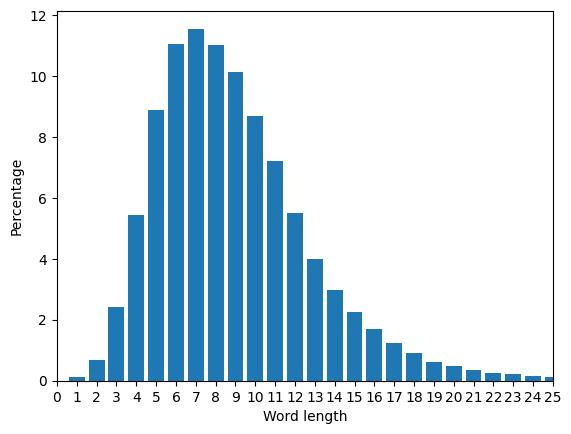

In [10]:
import json
from copy import copy
with open("../buenzli-corpus/comments.json", "r", encoding="utf-8") as f:
    comments = json.load(f)

word_frequencies = {}
for comment in comments:
    sentence = comment["body"]
    for word in sentence.split(" "):
        word = word.lower()
        if word not in word_frequencies:
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

total_words = sum(word_frequencies.values())

average_word_length = sum(len(word) * freq for word, freq in word_frequencies.items()) / total_words

print(average_word_length, sep="\n")


print(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:100])

buenzli_frequencies = copy(word_frequencies)
buenzli_frequencies_sorted = sorted(buenzli_frequencies.items(), key=lambda x: x[1], reverse=True)
# for each word length, count the number of words with that length
word_length_count_buenzli = {}
for word in buenzli_frequencies_sorted:
    if len(word[0]) in word_length_count_buenzli:
        word_length_count_buenzli[len(word[0])] += 1
    else:
        word_length_count_buenzli[len(word[0])] = 1






In [17]:

words_fr = set()
with open("../dicts/dictionary.csv", encoding="utf-8") as f:
    for line in f:
        for word in line.split():
            word = word.lower()
            words_fr.add(word)

words_it = set()
with open("../dicts/parole_uniche.txt", encoding="utf-8") as f:
    for line in f:
        for word in line.split():
            word = word.lower()
            words_it.add(word)

words_en = set()
with open("../dicts/words_alpha.txt", encoding="utf-8") as f:
    for line in f:
        for word in line.split():
            word = word.lower()
            words_en.add(word)

with open("../scripts/comments.json", "r", encoding="utf-8") as f:
    comments = json.load(f)

words_GSW = set(NOAH_frequencies.keys())


print(len(words_fr), len(words_it), len(words_en), len(words_GSW))
print("other langs", len((words_fr.union(words_it).union(words_en))))
print("other langs - GSW", len((words_fr.union(words_it).union(words_en).difference(words_GSW))))

IT_in_buenzli = {}
FR_in_buenzli = {}
EN_in_buenzli = {}
GSW_in_buenzli = {}
other_in_buenzli = {}

for comment in comments:
    if comment["language"] != "GSW":
        #print(f"Skipping {comment['language']} comment")
        continue
    sentence = comment["body"]
    for word in sentence.split(" "):
        word = word.lower()
        if word in words_GSW:
            if word not in GSW_in_buenzli:
                GSW_in_buenzli[word] = [comment["body"]]
            else:
                GSW_in_buenzli[word].append(comment["body"])
        elif word in words_fr:
            if word not in FR_in_buenzli:
                FR_in_buenzli[word] = [comment["body"]]
            else:
                FR_in_buenzli[word].append(comment["body"])
        elif word in words_it:
            if word not in IT_in_buenzli:
                IT_in_buenzli[word] = [comment["body"]]
            else:
                IT_in_buenzli[word].append(comment["body"])
        elif word in words_en:
            if word not in EN_in_buenzli:
                EN_in_buenzli[word] = [comment["body"]]
            else:
                EN_in_buenzli[word].append(comment["body"])
        else:
            if word not in other_in_buenzli:
                other_in_buenzli[word] = [comment["body"]]
            else:
                other_in_buenzli[word].append(comment["body"])


print(len(FR_in_buenzli), len(IT_in_buenzli), len(EN_in_buenzli), len(GSW_in_buenzli), len(other_in_buenzli))

380846 951064 370105 22526
other langs 1654494
other langs - GSW 1650636


KeyError: 'language'

In [25]:
"""
Utility data structures
"""

buenzli_words = set(buenzli_frequencies.keys())
NOAH_words = set(NOAH_frequencies.keys())

buenzli_words_not_in_NOAH = buenzli_words - NOAH_words
NOAH_words_not_in_buenzli = NOAH_words - buenzli_words

normalized_NOAH_frequencies = {word: freq / len(NOAH_words) for word, freq in NOAH_frequencies.items()}
normalized_buenzli_frequencies = {word: freq / len(buenzli_words) for word, freq in buenzli_frequencies.items()}

print(buenzli_frequencies["kreiswichs"])
print(buenzli_frequencies["chreiswichs"]) # A literal german translation of the english "circlejerk"
print(buenzli_frequencies["pfoste"])
print(buenzli_frequencies["pfostiere"])
print(buenzli_frequencies["post"])
print(buenzli_frequencies["enjoyer"])



1
3
114
14
308
1
